Task2-Color Identification in Images

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [35]:
image = cv2.imread('C:\\Users\\m.Rushendra varma\\Pictures\\colored photo.jpg')
cv2.imshow('i',image)
cv2.waitKey(0)

-1

The type of this input is <class 'numpy.ndarray'>
Shape: (1080, 1000, 3)


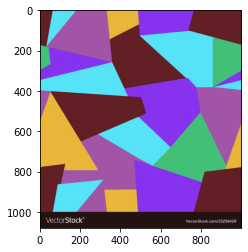

In [36]:
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

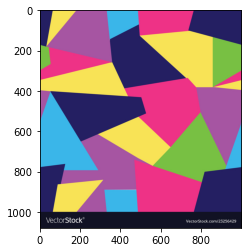

In [37]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

BGR to GRAY

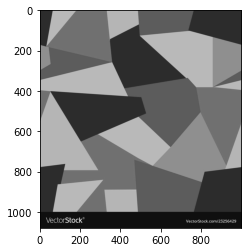

In [38]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

Resizing the image

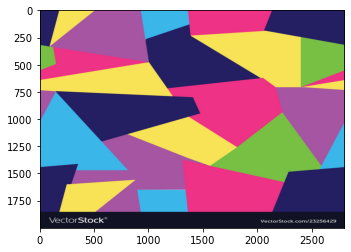

In [39]:
resized_image = cv2.resize(image, (2800, 2000))
plt.imshow(resized_image)

In [40]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [41]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [42]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [43]:
clf = KMeans(n_clusters = 10)
labels = clf.fit_predict(modified_image)

([<matplotlib.patches.Wedge at 0x28f346bd1c0>,
 [Text(0.8453852501980694, 0.703792425895269, '#57455f'),
  Text(0.18191213621179766, 1.084853895554079, '#111224'),
  Text(-0.4139044968543624, 1.019158018897824, '#241f62'),
  Text(-0.8864017551487113, 0.651376948064087, '#d5d5d8'),
  Text(-1.0958500678122272, 0.09546009048779137, '#f7e256'),
  Text(-0.8106320401025726, -0.7435561146000624, '#b69177'),
  Text(0.033803485064229456, -1.09948047931626, '#3ab5e8'),
  Text(0.833728653001507, -0.7175629123389062, '#a555a1'),
  Text(1.072163334666078, -0.24589791336592484, '#ed3285'),
  Text(1.0999907083513105, -0.004521232219458902, '#78bf43')])

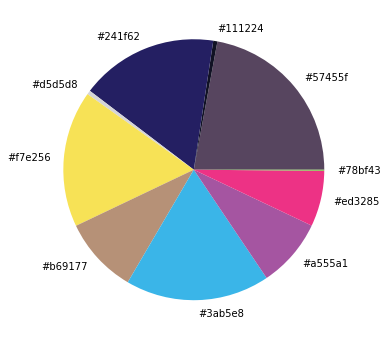

In [44]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

#if (show_chart):
plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

#return rgb_colors